This notebook presents the comparison of performance achieved by using different techniques in text analytics with Logistic Regression. The study is being conducted on clinical literature - specifically Contraception and Long-Acting Reversible Contraception.

## Data:

Six websites of recognized health organizations such as cdc.org have been chosen as sources of training data for our algorithm.  To generate training data for the Contraception class, we have conducted Google’s Site-Specific Search on these six websites with terms from a vocabulary of LARC terms. For generating training data for the other class, Site Specific Search was conducted on the same six websites with the same terms from our vocabulary preceded with a minus(-) sign so as to retrieve the link of any page that does not contain the negated terms, thus generating the complementary dataset. This class includes webpages about various health issues other than contraception. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
#Load the training data which contains 60 pages with the label "LARC" and 60 that belong to the "Other Class
df = pd.read_csv("training data.csv")
df.head()

,Category,Text
0,Other Class,"b'Hyperthyroidism Causes, Symptoms, Test, Diag..."
1,Other Class,b'Health Medical News and Doctor\'s Views - A-...
2,Other Class,"b'Leg Pain: Symptoms, Signs, Causes & Treatmen..."
3,Other Class,"b'What Is Compartment Syndrome? Surgery, Sympt..."
4,Other Class,b'Diseases & Conditions A-Z List - P on Medici...


In [3]:
#Apply a 75-25 split on the data set to test the model
training_data, testing_data = train_test_split(df, random_state=2000)

#Collect the labels for the training and testing data
train_labels = training_data['Category'].values
test_labels = testing_data['Category'].values

#Create the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, stop_words='english')

#Fit transform the training and test data on the vectorizer
tfidf_vectorizer.fit_transform(training_data['Text'].values)
training_features = tfidf_vectorizer.transform(training_data['Text'].values)
test_features = tfidf_vectorizer.transform(testing_data['Text'].values)

#Train a logistic regression model
logReg_Obj = LogisticRegression(verbose=1, solver='liblinear', random_state=0, C=5, penalty='l2', max_iter=1000)
model = logReg_Obj.fit(training_features, train_labels)

#Get predictions from the model
def get_single_labels(model, test_data):
    prediction_list = model.predict(test_data)
    return prediction_list

predicted_labels = get_single_labels(model, test_features)

[LibLinear]

In [4]:
predicted_labels

array(['LARC', 'LARC', 'Other Class', 'LARC', 'Other Class',
       'Other Class', 'LARC', 'Other Class', 'LARC', 'Other Class',
       'LARC', 'LARC', 'LARC', 'LARC', 'LARC', 'Other Class', 'LARC',
       'Other Class', 'LARC', 'Other Class', 'LARC', 'LARC', 'LARC',
       'LARC', 'Other Class', 'Other Class', 'Other Class', 'Other Class',
       'LARC', 'Other Class'], dtype=object)

In [5]:
test_labels

array(['LARC', 'LARC', 'LARC', 'LARC', 'Other Class', 'Other Class',
       'LARC', 'LARC', 'Other Class', 'Other Class', 'LARC', 'LARC',
       'LARC', 'LARC', 'LARC', 'Other Class', 'LARC', 'Other Class',
       'LARC', 'Other Class', 'LARC', 'LARC', 'LARC', 'LARC', 'LARC',
       'LARC', 'Other Class', 'Other Class', 'LARC', 'Other Class'],
      dtype=object)

In [6]:
def store_goldStd_against_pred(goldStd_labels, pred_labels):
    pred_goldStd = [[[goldStd_labels[i]], pred] for i, pred in enumerate(pred_labels)]
    return pred_goldStd

pred_goldStd_list = store_goldStd_against_pred(test_labels, predicted_labels)



In [7]:
def compute_num_correct_preds(pred_goldStd_list):
    correct = 0
    
    for item in pred_goldStd_list:
        
        goldStd = item[0]
        pred = item[1]

        for label in goldStd:
            if label in pred:
                correct += 1
               
    
    return correct

correct_predictions = compute_num_correct_preds(pred_goldStd_list)
correct_predictions

25

In [8]:
accuracy = correct_predictions/len(test_labels)
accuracy

0.8333333333333334

Since the model gives considerable accuracy, it can be applied to the actual test data.
The test data consists of 151 university health center pages that were found to contain LARC and 151 university health center pages on which LARC was not found. 

In [9]:
#Make sure to train the model on the entire training set, since in the experiment above the the model was trained on 75% of the training documents.

other_class = pd.read_csv("other class test file.csv")
LARC_class = pd.read_csv("larc test file.csv")

training_data_labels = df['Category'].values
other_class_goldStd_labels = other_class['Class']
LARC_class_goldStd_labels = LARC_class['Class']

#The vectorizer takes the type of ngrams that the model should be trained on and the min_df values as arguments
def create_vectorizer(ngram_type, min_df_value = None):

    if min_df_value == None:
        tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_type, use_idf=True, stop_words='english', max_df=0.95,)
    else:
        tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_type, use_idf=True, stop_words = 'english', max_df=0.95, min_df = min_df_value)
    return tfidf_vectorizer

def fit_transtorm_on_vectorizer(training_data, tfidf_vectorizer):
    tfidf_vectorizer.fit_transform(training_data['Text'].values)
    train_features = tfidf_vectorizer.transform(training_data['Text'].values)
    
    return train_features

def train_LR_model(X_train, Y_train):
    logReg_Obj = LogisticRegression(verbose=1, solver='liblinear', random_state=0, C=5, penalty='l2', max_iter=1000)
    model = logReg_Obj.fit(X_train, Y_train)
    return logReg_Obj, model

def get_single_labels(model, X_test):
    prediction = model.predict(X_test)
    return prediction

#The vectorizer is built for unigram features specified as (1,1)
tfidf_vectorizer = create_vectorizer((1,1))

#fit the vectorizer on training features
train_features = fit_transtorm_on_vectorizer(df, tfidf_vectorizer)

#transform the test data to get test features
other_class_features = tfidf_vectorizer.transform(other_class['Text'])
LARC_class_features = tfidf_vectorizer.transform(LARC_class['Text'])



In [10]:
#train the model
logReg_Obj, model = train_LR_model(train_features, training_data_labels)

#get predictions for test data
other_class_predictions = get_single_labels(model, other_class_features)
LARC_class_predictions = get_single_labels(model, LARC_class_features)



[LibLinear]

In [11]:

#Prepare to compute TP,TN,FP and FN
def compute_metrics(tfidf_vectorizer, LARC_class_goldStd_labels, other_class_goldStd_labels, LARC_class_predictions, other_class_predictions):
    TPpred = store_goldStd_against_pred(LARC_class_goldStd_labels, LARC_class_predictions)
    FNpred = store_goldStd_against_pred(other_class_goldStd_labels, LARC_class_predictions)
    TNpred = store_goldStd_against_pred(other_class_goldStd_labels, other_class_predictions)
    FPpred = store_goldStd_against_pred(LARC_class_goldStd_labels, other_class_predictions)

    TP = compute_num_correct_preds(TPpred)
    FN = compute_num_correct_preds(FNpred)
    TN = compute_num_correct_preds(TNpred)
    FP = compute_num_correct_preds(FPpred)

    Metric = []
    Score = []

    precision = TP / (TP + FP)
    Metric.append("Precision")
    Score.append(precision)
    
    recall = TP / (TP + FN)
    Metric.append("Recall")
    Score.append(recall)
    
    accuracy = (TP + TN) / (len(LARC_class_goldStd_labels) + len(other_class_goldStd_labels))
    Metric.append("accuracy")
    Score.append(accuracy)
    
    f1 = (2 * precision * recall) / (precision + recall)
    Metric.append("f1")
    Score.append(f1)
    
    #This is the number of features used by the logistic regression model
    num_of_features = len(tfidf_vectorizer.get_feature_names())
    
    data = [['TP', TP], ['FP', FP], ['TN', TN], ['FN', FN], ['precision', precision], ['recall', recall],
                ['accuracy', accuracy], ['f1', f1], ['Num of features', num_of_features]]

    df_metricScores = pd.DataFrame(data, columns=['Metrics', 'Score'])
    accuracy_f1 = [accuracy, f1]
    return df_metricScores, accuracy_f1, num_of_features
df_metricScores, accuracy_f1, num_of_features = compute_metrics(tfidf_vectorizer, LARC_class_goldStd_labels, other_class_goldStd_labels, LARC_class_predictions, other_class_predictions)
df_metricScores

,Metrics,Score
0,TP,28.000000
1,FP,1.000000
2,TN,150.000000
3,FN,123.000000
4,precision,0.965517
5,recall,0.185430
6,accuracy,0.589404
7,f1,0.311111
8,Num of features,13922.000000


This seems like the classic overfitting where the model does not perform well on unseen data but does good with the training data. It seems like the model is being trained on a very high number of features, that is causing the overfitting.

In clinical literature, the problem of overlapping features in a classification task can be resolved by using efficient feature engineering techniques.

We can attempt to use differnet n-grams and the constraint "min_df" to give features that are more specific for a class. The constraint “min df” or “minimum document frequency” means that a term should occur in a minimum number of documents for it to be considered as a feature. min df = 0.05 means ignore the terms that occur in less than 5% documents, min_df = 1 is the default.

Single term features are called as ‘Unigrams’. In order to preserve the single terms with their contexts, we have used bigrams or two-term phrases as features. For using bigram features, the entire document is split into two-term phrases instead of single terms. Thus, “shot” by itself would not be a feature in the bigram model but “depo shot” would. This makes features more specific for the required domain. We have experimented with models trained on Unigrams, Bigrams and a combination of Unigrams and Bigrams in our approach. 

In [12]:
#Get the features used by the model sorted by the weights assigned to them, this can be used for feature engineering
def get_features(logReg_Obj, tfidf_vectorizer):
    for i in logReg_Obj.coef_:

        weights = i

    arr = list(weights)

    abs_weights_arr = np.abs(arr)

    abs_weights = np.abs(list(logReg_Obj.coef_))

    # get the sorting indices
    sorted_index = np.argsort(-1 * abs_weights)
    feature_names = []
    feature_weights = []
    for i in np.array(tfidf_vectorizer.get_feature_names())[sorted_index]:
        feature_names = i

    for i in abs_weights_arr[sorted_index]:
        feature_weights = i

    feature_namesArr = list(feature_names)
    feature_weightsArr = list(feature_weights)

    features_df = pd.DataFrame(index=range(len(feature_weightsArr)))
    features_df['feature_names'] = pd.DataFrame(feature_namesArr)
    features_df['feature_weights'] = pd.DataFrame(feature_weightsArr)
    return features_df

Below, we compare the results obtained from the models trained on 'Unigram','Unigram and Bigram' and 'Bigram' features

[LibLinear]Type of model: Unigram
           Metrics         Score
0               TP     28.000000
1               FP      1.000000
2               TN    150.000000
3               FN    123.000000
4        precision      0.965517
5           recall      0.185430
6         accuracy      0.589404
7               f1      0.311111
8  Num of features  13922.000000
[LibLinear]Type of model: Unigram and Bigram
           Metrics         Score
0               TP     32.000000
1               FP      1.000000
2               TN    150.000000
3               FN    119.000000
4        precision      0.969697
5           recall      0.211921
6         accuracy      0.602649
7               f1      0.347826
8  Num of features  70034.000000
[LibLinear]Type of model: Bigram
           Metrics         Score
0               TP     44.000000
1               FP      1.000000
2               TN    150.000000
3               FN    107.000000
4        precision      0.977778
5           recall      0.2913

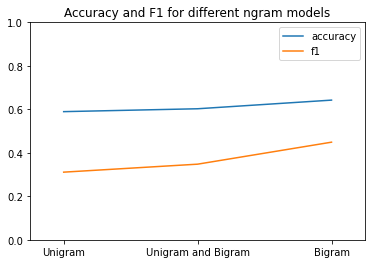

In [13]:
df_output = pd.DataFrame(columns = ['accuracy', 'f1'])
ngrams = [(1,1),(1,2),(2,2)]
ngram_names = ['Unigram','Unigram and Bigram','Bigram']

for i, ngram_type in enumerate(ngrams):
    tfidf_vectorizer = create_vectorizer(ngram_type)

    #fit the vectorizer on training features
    train_features = fit_transtorm_on_vectorizer(df, tfidf_vectorizer)

    #transform the test data to get test features
    other_class_features = tfidf_vectorizer.transform(other_class['Text'])
    LARC_class_features = tfidf_vectorizer.transform(LARC_class['Text'])
    #train the model
    model, logReg_Obj = train_LR_model(train_features, training_data_labels)

    #get predictions for test data
    other_class_predictions = get_single_labels(model, other_class_features)
    LARC_class_predictions = get_single_labels(model, LARC_class_features)
    df_metricScores, accuracy_f1, num_of_features = compute_metrics(tfidf_vectorizer, LARC_class_goldStd_labels, other_class_goldStd_labels, LARC_class_predictions, other_class_predictions)
    print("Type of model: {}".format(ngram_names[i]))
    print(df_metricScores)
    features_df = get_features(logReg_Obj, tfidf_vectorizer)
    features_filename = ngram_names[i]  + "_features.csv"
    features_df.to_csv(features_filename)     
    df_output.loc[i] = accuracy_f1


fig = df_output.plot()

fig.set_title('Accuracy and F1 for different ngram models')
plt.xlim(-0.25, 2.25)
plt.ylim(0.0, 1.0)


plt.xticks([0,1,2],ngram_names)
plt.show()

The comparison of performance shows that bigrams features are more specific for a class. The spike in F1-Score is steeper than that for accuracy.

[LibLinear]Type of model: Unigram 1
           Metrics         Score
0               TP     28.000000
1               FP      1.000000
2               TN    150.000000
3               FN    123.000000
4        precision      0.965517
5           recall      0.185430
6         accuracy      0.589404
7               f1      0.311111
8  Num of features  13922.000000
[LibLinear]Type of model: Unigram 0.05
           Metrics        Score
0               TP    50.000000
1               FP     1.000000
2               TN   150.000000
3               FN   101.000000
4        precision     0.980392
5           recall     0.331126
6         accuracy     0.662252
7               f1     0.495050
8  Num of features  2413.000000
[LibLinear]Type of model: Unigram 0.1
           Metrics        Score
0               TP    63.000000
1               FP     1.000000
2               TN   150.000000
3               FN    88.000000
4        precision     0.984375
5           recall     0.417219
6         acc

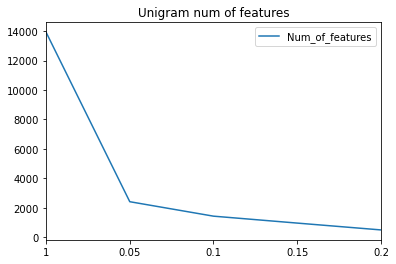

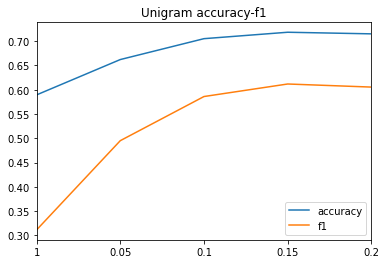

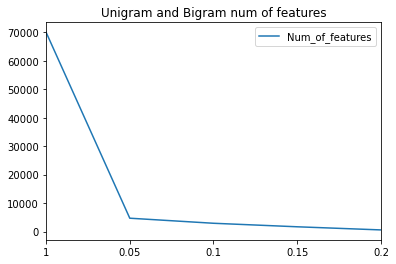

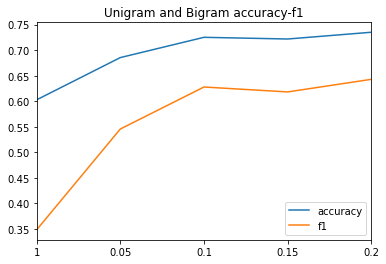

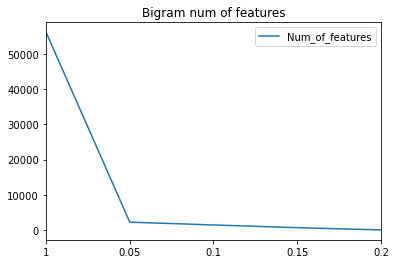

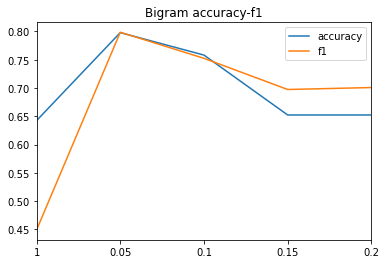

In [14]:

#Here we experiment with models using differnt combinations of values for n-grams and min_df
min_df = [1, 0.05, 0.1, 0.15, 0.2]


df_feat = pd.DataFrame(columns = ['Num_of_features'])
df_output_min_df = pd.DataFrame(columns = ['accuracy', 'f1'])
for n, ngram_type in enumerate(ngrams):
    for i, min_df_value in enumerate(min_df):
        tfidf_vectorizer = create_vectorizer(ngram_type, min_df_value)

        #fit the vectorizer on training features
        train_features = fit_transtorm_on_vectorizer(df, tfidf_vectorizer)

        #transform the test data to get test features
        other_class_features = tfidf_vectorizer.transform(other_class['Text'])
        LARC_class_features = tfidf_vectorizer.transform(LARC_class['Text'])
        #train the model
        model, logReg_Obj = train_LR_model(train_features, training_data_labels)

        #get predictions for test data
        other_class_predictions = get_single_labels(model, other_class_features)
        LARC_class_predictions = get_single_labels(model, LARC_class_features)
        df_metricScores, accuracy_f1, num_of_features = compute_metrics(tfidf_vectorizer, LARC_class_goldStd_labels, other_class_goldStd_labels, LARC_class_predictions, other_class_predictions)
        print("Type of model: {} {}".format(ngram_names[n],min_df_value))
        print(df_metricScores)
        features_df = get_features(logReg_Obj, tfidf_vectorizer)
        features_filename = ngram_names[n]  + str(min_df_value) + "_features.csv"
        features_df.to_csv(features_filename) 
        df_output_min_df.loc[i] = accuracy_f1
        df_feat.loc[i] = num_of_features
    fig1 = df_feat.plot()
    fig1_title = ngram_names[n]+" num of features"
    fig1.set_title(fig1_title)
    plt.xticks([0, 1, 2, 3, 4], ['1', '0.05', '0.1', '0.15', '0.2'])
    fig2 = df_output_min_df.plot()
    fig2_title = ngram_names[n]+" accuracy-f1"
    fig2.set_title(fig2_title)
    plt.xticks([0, 1, 2, 3, 4], ['1', '0.05', '0.1', '0.15', '0.2'])


plt.show()


The experiment above conducted that the best performance is achieved by the Bigrams model with min-df constraint as 0.05 with both accuracy and F1 as 79%. The number of features decreased from 56112 to 2275 after applying the min df = 0.05 constraint on the bigram model. This shows that many features were noisy. Since we are working with clinical data, bigrams seem to be able to establish the context of the domain better as terms get added meaning. This is clear when we consider the performance of the model with min df = 0.2 that is trained on only 76 bigram features which still gives nearly 70% F1 score.

The F1 showed a steeper increase in performance as compared to accuracy across the different models we experimented with and this shows that it is a better indicator of performance as it combines both precision and recall.

We have also recorded the features with their weights used by every model in the above experiments.

In [15]:
#view features

df_stored_features = pd.read_csv("Unigram0.05_features.csv")
df_stored_features.iloc[:20]

,Unnamed: 0,feature_names,feature_weights
0,0,iud,3.078680
1,1,birth,2.418087
2,2,contraceptive,2.276486
3,3,women,1.670860
4,4,pid,1.666276
5,5,control,1.523232
6,6,shot,1.417914
7,7,condoms,1.306905
8,8,ste,1.250017
9,9,locations,1.247323


In [16]:
#view features

df_stored_features = pd.read_csv("Bigrams0.05_features.csv")
df_stored_features.iloc[:20]

,Unnamed: 0,feature_names,feature_weights
0,0,birth control,4.130316
1,1,office locations,2.256194
2,2,sexual health,1.735727
3,3,x80 x99t,1.499732
4,4,mayo clinic,1.485697
5,5,inflammatory disease,1.381131
6,6,covid 19,1.371087
7,7,contraceptive use,1.336568
8,8,planned parenthood,1.308311
9,9,device iud,1.294954


The features displayed above against their weights show that since the terms are not 'stemmed', different forms of the words are assigned different weights. Below, we stem the data in order to generate stronger feayures for a particular class.

[LibLinear]Type of model: Unigram 1
           Metrics        Score
0               TP    34.000000
1               FP     1.000000
2               TN   150.000000
3               FN   117.000000
4        precision     0.971429
5           recall     0.225166
6         accuracy     0.609272
7               f1     0.365591
8  Num of features  9846.000000
[LibLinear]Type of model: Unigram 0.05
           Metrics        Score
0               TP    48.000000
1               FP     1.000000
2               TN   150.000000
3               FN   103.000000
4        precision     0.979592
5           recall     0.317881
6         accuracy     0.655629
7               f1     0.480000
8  Num of features  2039.000000
[LibLinear]Type of model: Unigram 0.1
           Metrics        Score
0               TP    65.000000
1               FP     1.000000
2               TN   150.000000
3               FN    86.000000
4        precision     0.984848
5           recall     0.430464
6         accuracy     

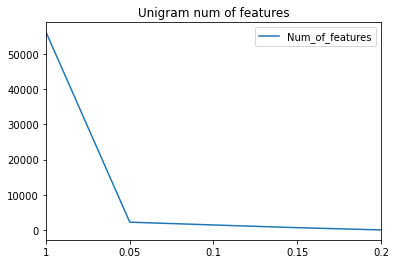

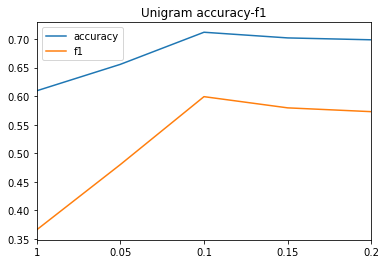

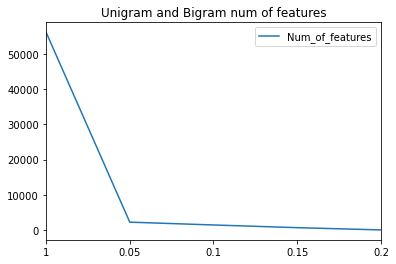

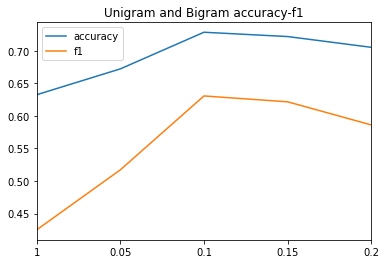

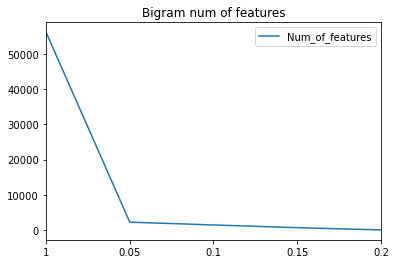

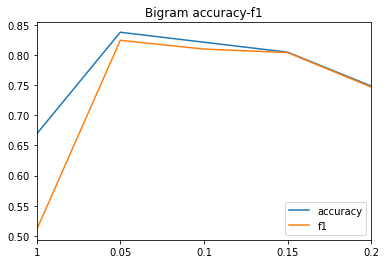

In [17]:
from nltk.stem import PorterStemmer
import re

#
def get_stemmed_data(data):
    corpus = []
    for i in range(len(data)):
        text = re.sub('[^a-zA-Z]', ' ', data['Text'].values[i])  
        text = text.split()
        ps = PorterStemmer()
        text = [ps.stem(word) for word in text]
        text = ' '.join(text)
        corpus.append(text)
    return corpus

min_df = [1, 0.05, 0.1, 0.15, 0.2]

df_output_min_df = pd.DataFrame(columns = ['accuracy', 'f1'])
for n, ngram_type in enumerate(ngrams):
    for i, min_df_value in enumerate(min_df):
        tfidf_vectorizer = create_vectorizer(ngram_type, min_df_value)

        #fit the vectorizer on training features
        training_data_stemmed = get_stemmed_data(df)
        #print(training_data_stemmed)
        
        tfidf_vectorizer.fit_transform(training_data_stemmed)
        train_features = tfidf_vectorizer.transform(training_data_stemmed)
        
        #transform the test data to get test features
        other_class_stemmed = get_stemmed_data(other_class)
        other_class_features = tfidf_vectorizer.transform(other_class_stemmed)
        
        LARC_class_stemmed = get_stemmed_data(LARC_class)
        LARC_class_features = tfidf_vectorizer.transform(LARC_class_stemmed)

        #train the model
        model, logReg_Obj = train_LR_model(train_features, training_data_labels)

        #get predictions for test data
        other_class_predictions = get_single_labels(model, other_class_features)
        LARC_class_predictions = get_single_labels(model, LARC_class_features)
        df_metricScores, accuracy_f1, num_of_features = compute_metrics(tfidf_vectorizer, LARC_class_goldStd_labels, other_class_goldStd_labels, LARC_class_predictions, other_class_predictions)
        print("Type of model: {} {}".format(ngram_names[n],min_df_value))
        print(df_metricScores)
        features_df = get_features(logReg_Obj, tfidf_vectorizer)
        features_filename = ngram_names[n] + str(min_df_value) + "stemmed_features.csv"
        features_df.to_csv(features_filename) 
        df_output_min_df.loc[i] = accuracy_f1
    fig1 = df_feat.plot()
    fig1_title = ngram_names[n]+" num of features"
    fig1.set_title(fig1_title)
    plt.xticks([0, 1, 2, 3, 4], ['1', '0.05', '0.1', '0.15', '0.2'])
    fig2 = df_output_min_df.plot()
    fig2_title = ngram_names[n]+" accuracy-f1"
    fig2.set_title(fig2_title)
    plt.xticks([0, 1, 2, 3, 4], ['1', '0.05', '0.1', '0.15', '0.2'])
    
plt.show()

In [18]:
df_stored_features = pd.read_csv("Unigram0.05stemmed_features.csv")
df_stored_features.iloc[:20]

,Unnamed: 0,feature_names,feature_weights
0,0,iud,3.448613
1,1,contracept,2.758571
2,2,birth,2.277838
3,3,condom,1.854207
4,4,pid,1.781965
5,5,ca,1.620933
6,6,women,1.569164
7,7,use,1.562668
8,8,control,1.483082
9,9,shot,1.447981


In [19]:
#view features
df_stored_features = pd.read_csv("Bigram0.05stemmed_features.csv")
df_stored_features.iloc[:20]

,Unnamed: 0,feature_names,feature_weights
0,0,birth control,4.100043
1,1,offic locat,2.492727
2,2,sexual health,1.635699
3,3,femal condom,1.534142
4,4,mayo clinic,1.486162
5,5,intrauterin devic,1.402444
6,6,contracept use,1.401259
7,7,care provid,1.357977
8,8,devic iud,1.300790
9,9,increas risk,1.298225


For the best performing model, stemming has increased the accuracy and F1 from 79% to 84 and 82% respectively. This proves our hypothesis that stemming can generate stronger features in medical domain literature.